In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [19]:
df = pd.read_csv('../data/DLD-1-spheroids-AFM/210302-AFM-data-SRL-AXCR-average-values.csv')
# add column with Pa unit
df['E_in_Pa'] = df.E_in_kPa * 1000
df['log_E'] = np.log10(df['E_in_kPa'])
df.head()

,E_in_kPa,group_id,E_in_Pa,log_E
0,0.194600,Matrigel,194.600,-0.710857
1,0.196600,Matrigel,196.600,-0.706416
2,0.176000,Matrigel,176.000,-0.754487
3,0.100786,Matrigel,100.786,-0.996600
4,0.271640,Matrigel,271.640,-0.566006


In [21]:
df.groupby('group_id').describe()

E_in_kPa                                                    \
             count      mean       std       min       25%       50%   
group_id                                                               
BB-94         18.0  0.212413  0.069755  0.123640  0.149489  0.203630   
Fixed         11.0  2.621055  1.187230  0.743400  1.404400  2.978600   
Laminin       20.0  0.145108  0.082253  0.028278  0.103262  0.127540   
Matrigel      15.0  0.199470  0.094648  0.057064  0.135780  0.194600   
No_Matrix     14.0  0.077343  0.042785  0.017778  0.043396  0.066451   

                             E_in_Pa               ...                       \
                75%      max   count         mean  ...         75%      max   
group_id                                           ...                        
BB-94      0.250145  0.33430    18.0   212.412778  ...   250.14500   334.30   
Fixed      3.316100  4.35520    11.0  2621.054545  ...  3316.10000  4355.20   
Laminin    0.185576  0.37658    20.0   145.108450  ...   185.57625   376.58   
Matrigel   0.260810  0.38564    15.0   199.470000  ...   260.81000   385.64   
No_Matrix  0.112011  0.16268    14.0    77.343464  ...   112.01150   162.68   

          log_E                                                              \
          count      mean       std       min       25%       50%       75%   
group_id                                                                      
BB-94      18.0 -0.695662  0.146440 -0.907841 -0.825408 -0.691163 -0.601808   
Fixed      11.0  0.364455  0.245651 -0.128777  0.147448  0.474012  0.520516   
Laminin    20.0 -0.909031  0.268878 -1.548551 -0.986130 -0.894442 -0.731505   
Matrigel   15.0 -0.754075  0.237958 -1.243638 -0.867202 -0.710857 -0.584051   
No_Matrix  14.0 -1.184143  0.276305 -1.750117 -1.362951 -1.177500 -0.951899   

                     
                max  
group_id             
BB-94     -0.475864  
Fixed      0.639008  
Laminin   -0.424143  
Matrigel  -0.413818  
No_Matrix -0.788666  

[5 rows x 24 columns]

In [3]:
# Note that because of the fixed sample is extremely stiff,
# it dominates the Tukey test and makes all other pairwise
# comparisons to be not different.
#
# This is because the raw data of fixed samples has vastly
# different scales of variance, which violates the assumptions
# of Tukey test (homogeneity of variance).
# 
# For robust comparisons, we performed stats on log-transformed
# data which satistifies the Tukey test assumption.
#
# Another strategy is to compare groups without the fixed group.

# All groups
tukeyTest(df.E_in_kPa, df.group_id)

# Compare log-transformed data
tukeyTest(df.log_E, df.group_id)

# Without fixed
df_filtered = df[df.group_id != 'Fixed']
tukeyTest(df_filtered.E_in_kPa, df_filtered.group_id)

Summary of test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj  lower   upper  reject
--------------------------------------------------------
   BB-94     Fixed   2.4086 0.001  1.9323   2.885   True
   BB-94   Laminin  -0.0673   0.9 -0.4717  0.3371  False
   BB-94  Matrigel  -0.0129   0.9 -0.4481  0.4222  False
   BB-94 No_Matrix  -0.1351   0.9 -0.5786  0.3085  False
   Fixed   Laminin  -2.4759 0.001 -2.9432 -2.0087   True
   Fixed  Matrigel  -2.4216 0.001 -2.9157 -1.9275   True
   Fixed No_Matrix  -2.5437 0.001 -3.0452 -2.0422   True
 Laminin  Matrigel   0.0544   0.9 -0.3708  0.4795  False
 Laminin No_Matrix  -0.0678   0.9 -0.5015   0.366  False
Matrigel No_Matrix  -0.1221   0.9 -0.5847  0.3404  False
--------------------------------------------------------
p values of all pair-wise tests:
 [0.001 0.9   0.9   0.9   0.001 0.001 0.001 0.9   0.9   0.9  ]
Summary of test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    g

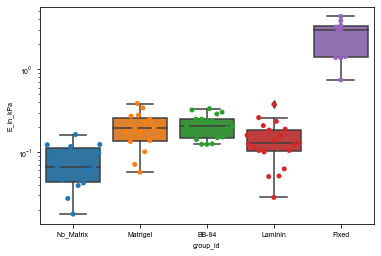

In [4]:
ax = sns.boxplot(data=df, x='group_id', y='E_in_kPa',
                 order=['No_Matrix', 'Matrigel', 'BB-94', 'Laminin', 'Fixed'])

sns.swarmplot(data=df, x='group_id', y='E_in_kPa',
              order=['No_Matrix', 'Matrigel', 'BB-94', 'Laminin', 'Fixed'], ax=ax)

ax.set_yscale('log')

<AxesSubplot:xlabel='group_id', ylabel='E_in_kPa'>

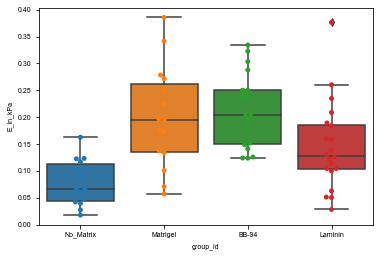

In [5]:
ax = sns.boxplot(data=df, x='group_id', y='E_in_kPa',
                 order=['No_Matrix', 'Matrigel', 'BB-94', 'Laminin'])

sns.swarmplot(data=df, x='group_id', y='E_in_kPa',
              order=['No_Matrix', 'Matrigel', 'BB-94', 'Laminin'], ax=ax)

# ax.set_yscale('log')

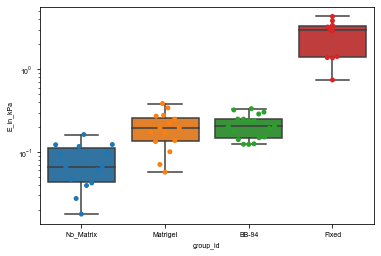

In [6]:
# ignore laminin
ax = sns.boxplot(data=df, x='group_id', y='E_in_kPa',
                 order=['No_Matrix', 'Matrigel', 'BB-94', 'Fixed'])
sns.swarmplot(data=df, x='group_id', y='E_in_kPa',
              order=['No_Matrix', 'Matrigel', 'BB-94', 'Fixed'], ax=ax)
ax.set_yscale('log')

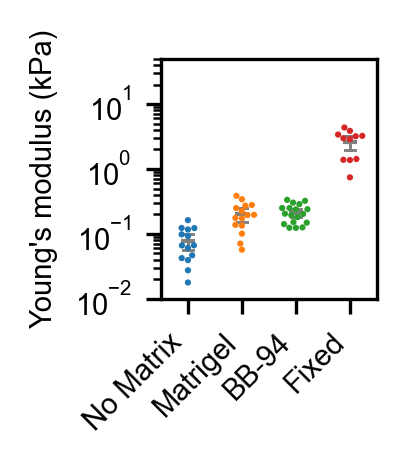

In [7]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'DLD-1-AFM-E-plot'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.svg'

fig_width, fig_height = .9, 1.0
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'E_in_kPa'
ax.set_ylim([0.01, 50])

# xCol, yCol = 'group_id', 'E_in_Pa'
# ax.set_ylim([10, 50000])

plottingOrder = ['No_Matrix', 'Matrigel', 'BB-94', 'Fixed']

# # Customize color of each group
# paletteDict = {'No_Matrix': 'black', 'Matrigel': 'green',
#                'BB-94': 'orange', 'Laminin': 'gray', 'Fixed': 'red'}

# Note: it makes a difference to set log scale before or after!
ax.set_yscale('log') 

ax = sns.swarmplot(x=xCol, y=yCol, data=df, order=plottingOrder,
#                    hue='group_id', palette=paletteDict,
                   size=1.5)
ax = sns.pointplot(x=xCol, y=yCol, data=df, order=plottingOrder,
                   ci=95, capsize=.2, errwidth=.7,
#                    hue='group_id', palette=paletteDict,
                   color='Gray',
                   markers='_', scale=.5, join=False)

plt.xlabel("")
plt.ylabel("Young's modulus (kPa)")
# plt.ylabel("Young's modulus (Pa)")

# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
x_labels = ['No Matrix', 'Matrigel', 'BB-94', 'Fixed']
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


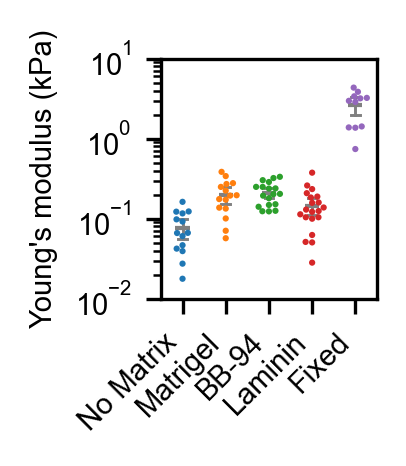

In [8]:
# Make swarm plot with error bars

datasetPrefix = 'DLD-1-AFM-E-plot-with-laminin'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.svg'

fig_width, fig_height = 0.9, 1.0
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'group_id', 'E_in_kPa'
plottingOrder = ['No_Matrix', 'Matrigel', 'BB-94', 'Laminin', 'Fixed']

# # Customize color of each group
# paletteDict = {'No_Matrix': 'black', 'Matrigel': 'green',
#                'BB-94': 'orange', 'Laminin': 'gray', 'Fixed': 'red'}

# Note: it makes a difference to set log scale before or after!
ax.set_yscale('log') 

ax = sns.swarmplot(x=xCol, y=yCol, data=df, order=plottingOrder,
#                    hue='group_id', palette=paletteDict,
                   size=1.5)
ax = sns.pointplot(x=xCol, y=yCol, data=df, order=plottingOrder,
                   ci=95, capsize=.2, errwidth=.7,
#                    hue='group_id', palette=paletteDict,
                   color='Gray',
                   markers='_', scale=.5, join=False)

plt.xlabel("")
plt.ylabel("Young's modulus (kPa)")

ax.set_ylim([0.01, 10])

# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
x_labels = ['No Matrix', 'Matrigel', 'BB-94', 'Laminin', 'Fixed']
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


In [9]:
def get_force_indentation_df(force_file):
    '''TO COMPLETE
    '''
    with open(force_file) as f:
        lines = f.readlines()

    segments = []
    data_lines = []
    for line in lines:
        if line.startswith('# recorded-num-points:'):
            segments.append(int(line.strip().split(':')[1].strip()))
        if len(line.strip())>0 and (not line.startswith('#')):
            data_lines.append(line)

    data = [line.strip().split(' ') for line in data_lines]
    df = pd.DataFrame(data)
    df = df.astype('float')
    df.columns = ['Indentation (µm)', 'Force (nN)']
    df['Indentation (µm)'] = df['Indentation (µm)']*1e6
    df['Force (nN)'] = df['Force (nN)']*1e9
    df['segments'] = ['approach']*segments[0] + ['withdraw']*segments[1]
    
    return df

In [10]:
force_file = '../data/DLD-1-spheroids-AFM/force-curve-examples/new_spheroid7.4_3nN_10zl_5speed.txt'

df = get_force_indentation_df(force_file)


In [11]:
df.dtypes

Indentation (µm)    float64
Force (nN)          float64
segments             object
dtype: object

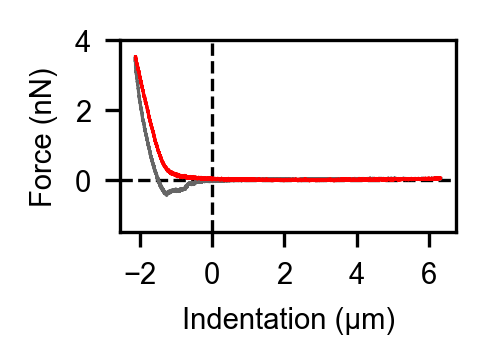

In [17]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'DLD-1-AFM-force-curve-example'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.svg'

fig_width, fig_height = 1.4, 0.8
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xCol, yCol = 'Indentation (µm)', 'Force (nN)'
# plottingOrder = ['No_Matrix', 'Laminin', 'Matrigel', 'BB-94', 'Fixed']

# Customize color of each group
paletteDict = {'approach': 'red', 'withdraw': '.4'}
hue_order = ['withdraw', 'approach']

ax.axhline(y=0, ls='--', lw=.8, c='k')
ax.axvline(x=0, ls='--', lw=.8, c='k')

ax = sns.lineplot(x=xCol, y=yCol,
                  size=.8, legend=False,
                  hue_order=hue_order, hue='segments', palette=paletteDict,
                  data=df)

plt.ylim([-1.5,4])
plt.xticks([-2, 0, 2, 4, 6])
# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
# x_labels = ['No Matrix', 'Laminin', 'Matrigel', 'BB-94', 'Fixed']
# ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)


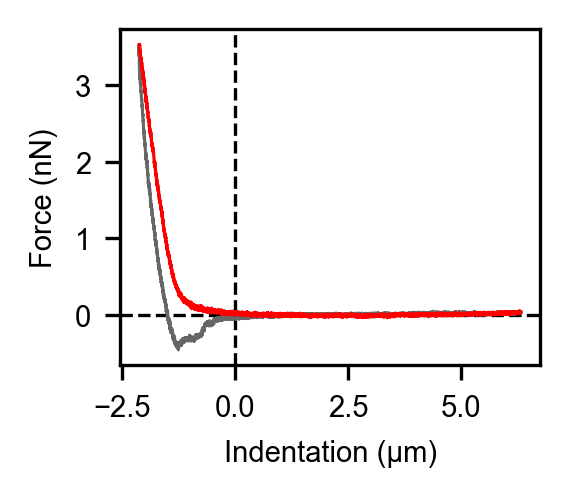

In [13]:
# Make swarm plot with error bars for the raw counts
datasetPrefix = 'DLD-1-AFM-force-curve-example'
outputFigPath = '../jupyter_figures/' + datasetPrefix + '.png'

fig_width, fig_height = 2.0, 1.6
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.2, 0.25, 0.7, 0.7])

xCol, yCol = 'Indentation (µm)', 'Force (nN)'
# plottingOrder = ['No_Matrix', 'Laminin', 'Matrigel', 'BB-94', 'Fixed']

# Customize color of each group
paletteDict = {'approach': 'red', 'withdraw': '.4'}
hue_order = ['withdraw', 'approach']

ax.axhline(y=0, ls='--', lw=.8, c='k')
ax.axvline(x=0, ls='--', lw=.8, c='k')

ax = sns.lineplot(x=xCol, y=yCol,
                  size=.8, legend=False,
                  hue_order=hue_order, hue='segments', palette=paletteDict,
                  data=df)

ax.set_yticks([0, 1, 2, 3])

# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
# x_labels = ['No Matrix', 'Laminin', 'Matrigel', 'BB-94', 'Fixed']
# ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)
